In [45]:
import os
import torch
import rasterio
from torch.utils.data import Dataset, DataLoader
from skimage.transform import resize
import matplotlib.pyplot as plt
from transformers import Swin2SRImageProcessor, Swin2SRForImageSuperResolution
from torch.optim import Adam
from tqdm import tqdm
from PIL import Image
import numpy as np

hr_size = 128 

class SRDataset(Dataset):
    def __init__(self, data_paths, lr_size=(64, 64), hr_size=(128, 128)):
        self.data_paths = data_paths
        self.lr_size = lr_size
        self.hr_size = hr_size

    def __len__(self):
        return len(self.data_paths)

    def __getitem__(self, idx):
        image_path = self.data_paths[idx]
        
        img = Image.open(image_path).convert('RGB')  
        
        img = np.array(img) 
        
        lr_img = resize(img, self.lr_size, anti_aliasing=True, preserve_range=True)  
        hr_img = resize(img, self.hr_size, anti_aliasing=True, preserve_range=True) 

        lr_img = lr_img / 255.0
        hr_img = hr_img / 255.0


        lr_tensor = torch.tensor(lr_img, dtype=torch.float32).permute(2, 0, 1)  # [3, 64, 64]
        hr_tensor = torch.tensor(hr_img, dtype=torch.float32).permute(2, 0, 1)  # [3, 128, 128]

        return lr_tensor, hr_tensor


def filter_120x120_images(datasetPath):
    imagePaths = []
    for root, dirs, files in os.walk(datasetPath):
        for file in files:
            image_path = os.path.join(root, file)
            with rasterio.open(image_path) as src:
                if src.width == 120 and src.height == 120:
                    imagePaths.append(image_path)
                else:
                    print(f"Skipping image {file} with size {src.width}x{src.height}")

    return imagePaths

datasetPath = r"SampleDataset"
imagePaths = filter_120x120_images(datasetPath)

dataset = SRDataset(imagePaths, lr_size=(64, 64), hr_size=(128, 128)) 
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)


In [46]:
print(next(iter(dataloader))[0].shape, next(iter(dataloader))[1].shape)

torch.Size([2, 3, 64, 64]) torch.Size([2, 3, 128, 128])


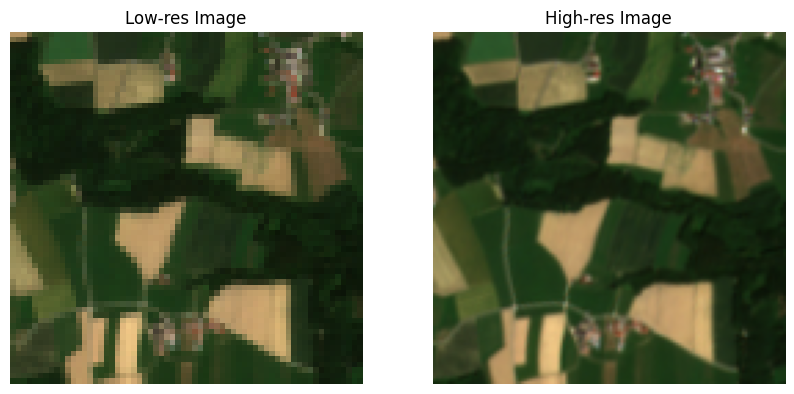

In [47]:
import matplotlib.pyplot as plt


lr_img, hr_img = next(iter(dataloader))

lr_img = lr_img.permute(0, 2, 3, 1).numpy() 
hr_img = hr_img.permute(0, 2, 3, 1).numpy() 

plt.figure(figsize=(10, 5))

# display low-resolution image
plt.subplot(1, 2, 1)
plt.imshow(lr_img[0])  
plt.title("Low-res Image")
plt.axis('off') 

# display high-resolution image
plt.subplot(1, 2, 2)
plt.imshow(hr_img[0])  
plt.title("High-res Image")
plt.axis('off') 

plt.show()


Epoch 1/20:   0%|          | 0/252 [00:00<?, ?it/s, Loss=0.0002]

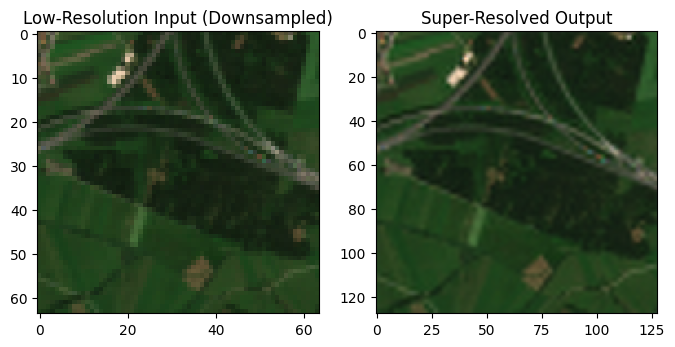

Epoch 1/20: 100%|██████████| 252/252 [01:17<00:00,  3.24it/s, Loss=0.0001]


Epoch [1/20], Average Loss: 0.0001


Epoch 2/20: 100%|██████████| 252/252 [01:19<00:00,  3.18it/s, Loss=0.0001]


Epoch [2/20], Average Loss: 0.0001


Epoch 3/20: 100%|██████████| 252/252 [01:20<00:00,  3.13it/s, Loss=0.0001]


Epoch [3/20], Average Loss: 0.0001


Epoch 4/20: 100%|██████████| 252/252 [01:20<00:00,  3.12it/s, Loss=0.0001]


Epoch [4/20], Average Loss: 0.0001


Epoch 5/20: 100%|██████████| 252/252 [01:21<00:00,  3.08it/s, Loss=0.0001]


Epoch [5/20], Average Loss: 0.0001


Epoch 6/20:   0%|          | 0/252 [00:00<?, ?it/s, Loss=0.0000]

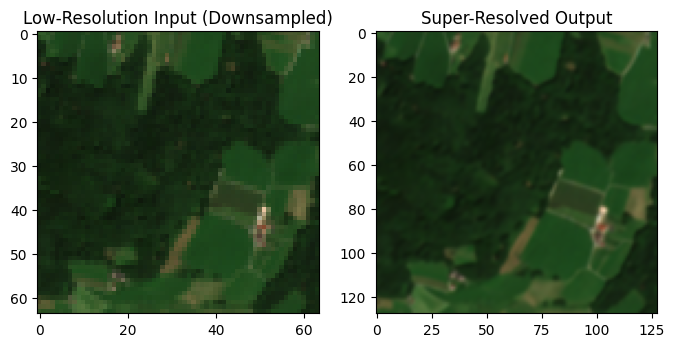

Epoch 6/20: 100%|██████████| 252/252 [01:23<00:00,  3.03it/s, Loss=0.0001]


Epoch [6/20], Average Loss: 0.0001


Epoch 7/20: 100%|██████████| 252/252 [01:23<00:00,  3.02it/s, Loss=0.0001]


Epoch [7/20], Average Loss: 0.0001


Epoch 8/20: 100%|██████████| 252/252 [01:22<00:00,  3.05it/s, Loss=0.0001]


Epoch [8/20], Average Loss: 0.0001


Epoch 9/20: 100%|██████████| 252/252 [01:22<00:00,  3.07it/s, Loss=0.0001]


Epoch [9/20], Average Loss: 0.0001


Epoch 10/20: 100%|██████████| 252/252 [01:21<00:00,  3.11it/s, Loss=0.0001]


Epoch [10/20], Average Loss: 0.0001


Epoch 11/20:   0%|          | 0/252 [00:00<?, ?it/s, Loss=0.0000]

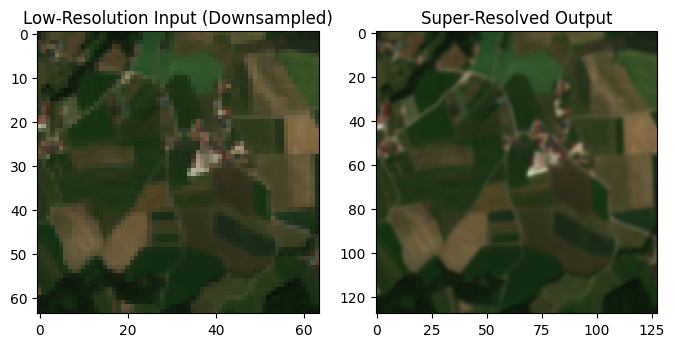

Epoch 11/20: 100%|██████████| 252/252 [01:19<00:00,  3.18it/s, Loss=0.0001]


Epoch [11/20], Average Loss: 0.0001


Epoch 12/20: 100%|██████████| 252/252 [01:21<00:00,  3.11it/s, Loss=0.0001]


Epoch [12/20], Average Loss: 0.0001


Epoch 13/20: 100%|██████████| 252/252 [01:21<00:00,  3.10it/s, Loss=0.0000]


Epoch [13/20], Average Loss: 0.0001


Epoch 14/20: 100%|██████████| 252/252 [01:22<00:00,  3.07it/s, Loss=0.0000]


Epoch [14/20], Average Loss: 0.0001


Epoch 15/20: 100%|██████████| 252/252 [01:21<00:00,  3.10it/s, Loss=0.0001]


Epoch [15/20], Average Loss: 0.0001


Epoch 16/20:   0%|          | 0/252 [00:00<?, ?it/s, Loss=0.0000]

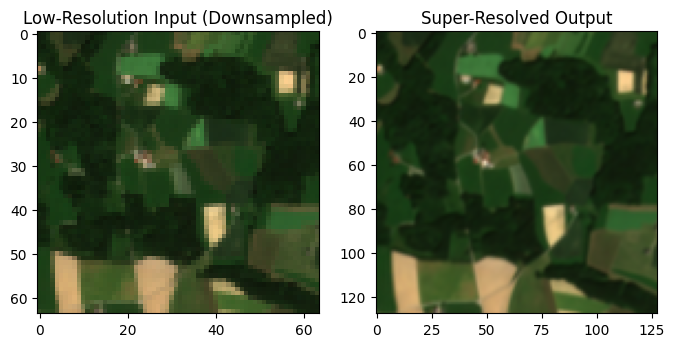

Epoch 16/20: 100%|██████████| 252/252 [01:23<00:00,  3.02it/s, Loss=0.0001]


Epoch [16/20], Average Loss: 0.0001


Epoch 17/20: 100%|██████████| 252/252 [01:24<00:00,  2.97it/s, Loss=0.0001]


Epoch [17/20], Average Loss: 0.0001


Epoch 18/20: 100%|██████████| 252/252 [01:24<00:00,  2.97it/s, Loss=0.0000]


Epoch [18/20], Average Loss: 0.0001


Epoch 19/20: 100%|██████████| 252/252 [01:22<00:00,  3.04it/s, Loss=0.0001]


Epoch [19/20], Average Loss: 0.0001


Epoch 20/20: 100%|██████████| 252/252 [01:22<00:00,  3.06it/s, Loss=0.0000]

Epoch [20/20], Average Loss: 0.0001


In [50]:
processor = Swin2SRImageProcessor.from_pretrained("caidas/swin2SR-classical-sr-x2-64")
model = Swin2SRForImageSuperResolution.from_pretrained("caidas/swin2SR-classical-sr-x2-64")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = torch.nn.MSELoss()
optimizer = Adam(model.parameters(), lr=1e-4)

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    progress_bar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (lr_tensor, hr_tensor) in enumerate(progress_bar):
        lr_tensor, hr_tensor = lr_tensor.to(device), hr_tensor.to(device)

        optimizer.zero_grad()
        inputs = {'pixel_values': lr_tensor}
        outputs = model(**inputs)
        sr_image = outputs.reconstruction

        loss = criterion(sr_image, hr_tensor)
        epoch_loss += loss.item()

        loss.backward()
        optimizer.step()
        progress_bar.set_postfix({"Loss": f"{loss.item():.4f}"})

        if epoch % 5 == 0 and batch_idx == 0:
            plt.figure(figsize=(8, 4))

            plt.subplot(1, 2, 1)
            lr_img = lr_tensor[0].permute(1, 2, 0).cpu().numpy() 
            plt.imshow(lr_img)  
            plt.title("Low-Resolution Input (Downsampled)")

            plt.subplot(1, 2, 2)
            sr_img = sr_image[0].permute(1, 2, 0).cpu().detach().numpy()
            plt.imshow(sr_img) 
            plt.title("Super-Resolved Output")

            plt.show()

    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {epoch_loss/len(dataloader):.4f}")

model.save_pretrained("fine_tuned_swin2sr")

  0%|          | 0/252 [00:00<?, ?it/s]

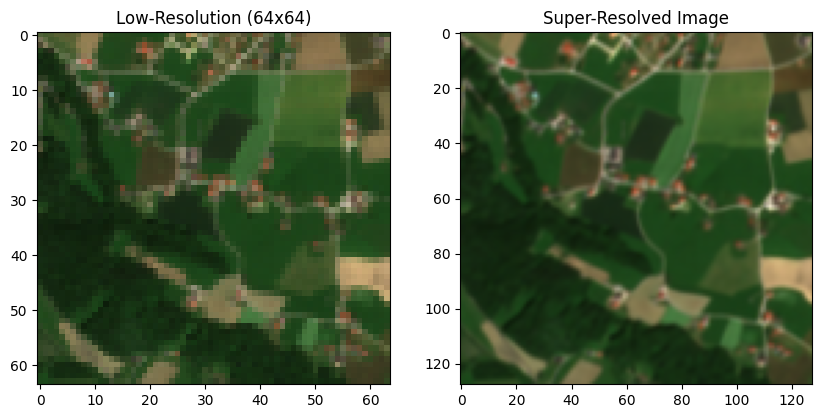

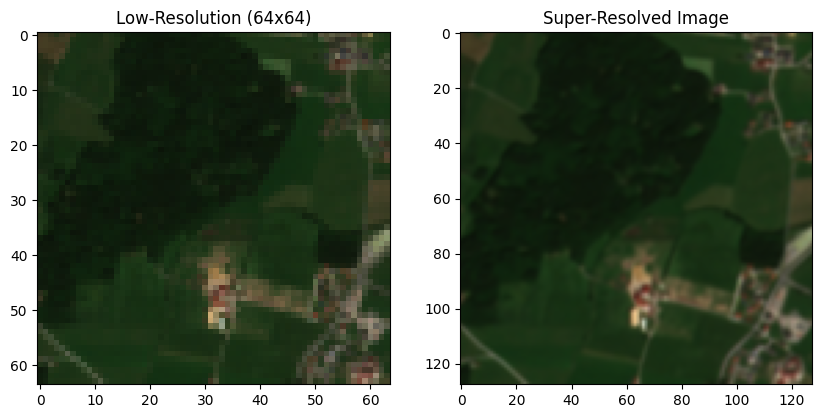

  0%|          | 0/252 [00:00<?, ?it/s]


In [51]:
import torch
import matplotlib.pyplot as plt
from transformers import Swin2SRForImageSuperResolution
from tqdm import tqdm

model.eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def visualize_super_resolve_dataloader(dataloader):
    for batch_idx, (lr_tensor, hr_tensor) in enumerate(tqdm(dataloader)):
        lr_tensor, hr_tensor = lr_tensor.to(device), hr_tensor.to(device)

        with torch.no_grad():
            inputs = {'pixel_values': lr_tensor}
            outputs = model(**inputs)
            sr_image = outputs.reconstruction 

        for i in range(lr_tensor.shape[0]): 
            plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)
            lr_img = lr_tensor[i].permute(1, 2, 0).cpu().numpy() 
            plt.imshow(lr_img)  
            plt.title("Low-Resolution (64x64)")

            plt.subplot(1, 2, 2)
            sr_img = sr_image[i].permute(1, 2, 0).cpu().detach().numpy() 
            plt.imshow(sr_img) 
            plt.title("Super-Resolved Image")

            plt.show()

        break  

visualize_super_resolve_dataloader(dataloader)


  0%|          | 0/252 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


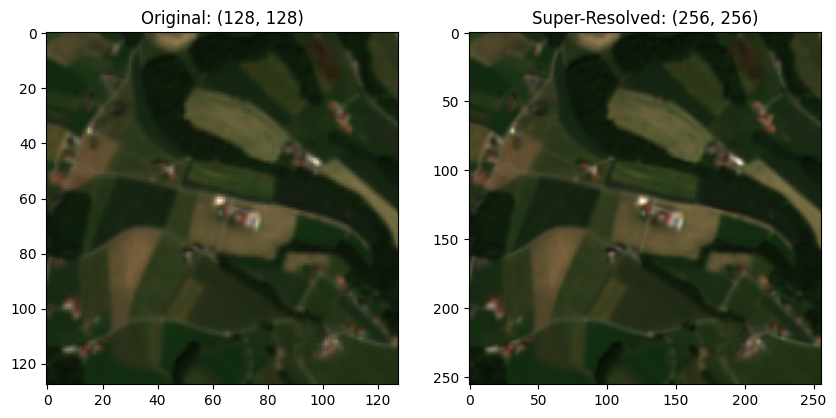

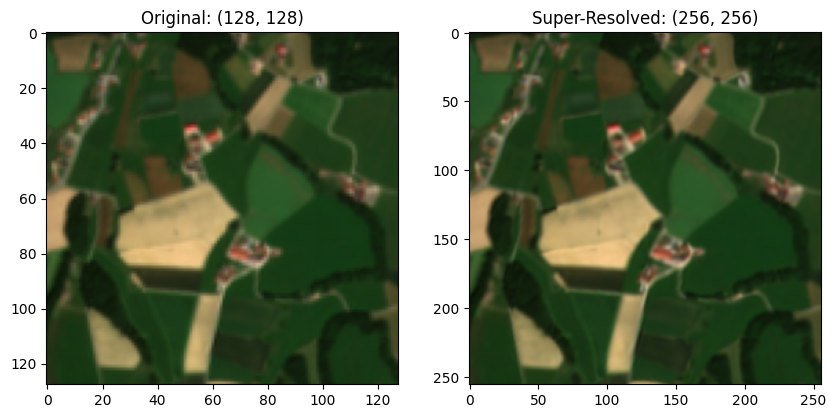

  0%|          | 0/252 [00:00<?, ?it/s]


In [56]:
import torch
import matplotlib.pyplot as plt
from transformers import Swin2SRForImageSuperResolution
from tqdm import tqdm

model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def super_resolve_images(dataloader):
    model.eval() 
    for batch_idx, (lr_tensor, hr_tensor) in enumerate(tqdm(dataloader)):
        hr_tensor = hr_tensor.to(device) 

        with torch.no_grad():
            inputs = {'pixel_values': hr_tensor} 
            outputs = model(**inputs)
            sr_image = outputs.reconstruction 

        for i in range(hr_tensor.shape[0]): 
            plt.figure(figsize=(10, 5))


            plt.subplot(1, 2, 1)
            hr_img = hr_tensor[i].permute(1, 2, 0).cpu().numpy() 
            plt.imshow(hr_img) 
            plt.title("Original: " + str(hr_img.shape[:2]))

            plt.subplot(1, 2, 2)
            sr_img = sr_image[i].permute(1, 2, 0).cpu().detach().numpy() 
            plt.imshow(sr_img)  
            plt.title("Super-Resolved: " + str(sr_img.shape[:2]))

            plt.show()

        return hr_img, sr_img

# Example: Super-resolve images from the DataLoader
original, sr = super_resolve_images(dataloader)


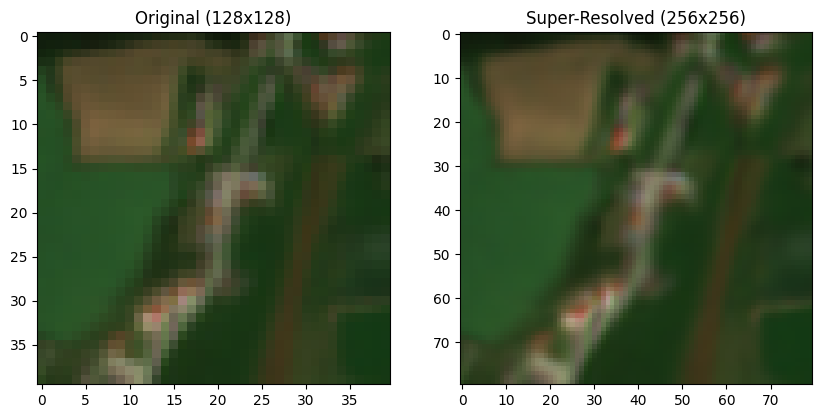

In [60]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original[:40, :40])
plt.title("Original (128x128)")

plt.subplot(1, 2, 2)
plt.imshow(sr[:80, :80])
plt.title("Super-Resolved (256x256)")

plt.show()
